# 1. Logistic Regression for Binary Classification (1.5 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1.1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

1.2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

1.3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

1.4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 

## Answer

### 1.1
$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$ \

$$p(y|\mathbf{o}+c) = softmax(\mathbf{o}+c)_{y} = \frac{\exp(o_y+c)}{\sum_{y'} \exp(o_{y'}+c)} = \frac{\exp(c)\exp(o_y)}{\sum_{y'} \exp(c)exp(o_{y'})} = \frac{\exp(c)\exp(o_y)}{exp(c)\sum_{y'} \exp(o_{y'})} = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

### 1.2 
For binary classification, we have:
$$p(y=1|\mathbf{o}) = \mathrm{softmax}(\mathbf{o_1}) = \frac{\exp(o_1)}{\sum_{y'} \exp(o_{y'})} = \frac{\exp(o_1)}{exp(o_{-1}) + exp(o_{1})}$$
Using the shorthand o = o1, we get:
$$p(y=1|\mathbf{o}) = \frac{\exp(o)}{exp(o_{-1}) + exp(o)}$$
Since we set $o_{-1} = 0$, 
$$p(y=1|\mathbf{o}) = \frac{\exp(o)}{1 + exp(o)} = \frac{1}{1 + exp(-o)}$$

### 1.3 
Since in binary classification, we have:
$$p(y=1|\mathbf{o}) + p(y=-1|\mathbf{o}) = 1$$
Thus, we have: 
$$p(y=-1|\mathbf{o}) = 1 - p(y=1|\mathbf{o}) = 1 - \frac{\exp(o)}{1 + exp(o)} = \frac{1}{1 + exp(o)}$$
Then, we can use the following expression to generalize $p(y|\mathbf{o})$:

$$p(y|\mathbf{o}) = \frac{1}{1 + exp(-y \cdot o)}$$
Finally, 
$$-\log p(y|o) = -\log \frac{1}{1 + exp(-y \cdot o)} = -(\log(1) - log(1+exp(-y \cdot o))) = log(1+exp(-y \cdot o))$$

### 1.4
For y = 1, 
$$-\log p(y=1|o) = log(1+exp(-o))$$
When $o \to \infty$, $$exp(-o) \to 0, log(1+exp(-o)) \to 0$$
Similarly, when $o \to -\infty$, $$exp(-o) \to \infty, log(1+exp(-o)) \to \infty$$


# 2. Implementing the binary logistic loss (1 point)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in the autograd-enabled numerical computing library of your choice (TensorFlow, PyTorch, mxnet, JAX, etc.)
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Plot its derivative with respect to $o$ for $o \in [-5, 5]$ by using the automatic differentiation capabilities of the library you chose.

### 2.1 Implementation of binary logistic loss using PyTorch

In [ ]:
import numpy as np
import torch

In [ ]:
def bi_logit_loss(y, o):
  return torch.log(1 + torch.exp(-y*o))

In [ ]:
o = torch.arange(start=-5,end=6,dtype= torch.float32, requires_grad=True)
o_rep = torch.arange(start=-5,end=6,dtype= torch.float32, requires_grad=True)
pos_y = torch.ones(len(o))
neg_y = -torch.ones(len(o))
pos_loss = bi_logit_loss(pos_y, o)
neg_loss = bi_logit_loss(neg_y, o_rep)

In [ ]:
pos_loss.backward(gradient=torch.ones(len(o)))
neg_loss.backward(gradient=torch.ones(len(o)))

### 2.2 Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.

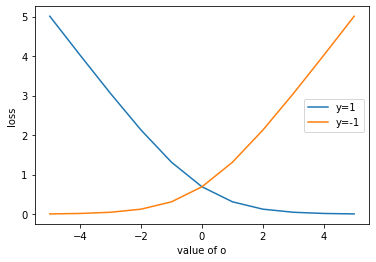

In [ ]:
import matplotlib.pyplot as plt
plt.plot(o.detach().numpy(),pos_loss.detach().numpy(),label="y=1")
plt.plot(o.detach().numpy(),neg_loss.detach().numpy(),label="y=-1")
plt.xlabel("value of o")
plt.ylabel("loss")
plt.legend()
plt.show()

### 2.3 Plot its derivative with respect to $o$ for $o \in [-5, 5]$

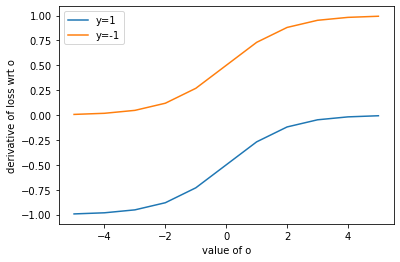

In [ ]:
plt.plot(o.detach().numpy(),o.grad.detach().numpy(),label="y=1")
plt.plot(o.detach().numpy(),o_rep.grad.detach().numpy(),label="y=-1")
plt.xlabel("value of o")
plt.ylabel("derivative of loss wrt o")
plt.legend()
plt.show()

# 3. T-shirt vs. Trouser classification (1.5 points)

1. Implement a logistic regression model on the Fashion MNIST datasets that classifies between t-shirts and trousers, rather than all 10 of the classes. Feel free to use the softmax regression code from the textbook (sections 3.5-3.7), but use the binary logistic loss you defined above (which assumes that the labels are -1 or 1) rather than a softmax cross-entropy loss. This will require creating custom version of the `d2l.load_data_fashion_mnist` that removes any examples that are not t-shirts or trousers, and maps the labels to -1 and 1.
2. After implementing this model and getting it to work, try changing the learning rate and weight initialization scale. Can you get the model to train more quickly? What values of these hyperparameters result in bad models/poor training dynamics?

*Note*: Make sure the runtime type is "GPU" to speed things up!

## Dataset

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST

In [ ]:
## Download the training and testing set
dataset = FashionMNIST(root='data/', train=True, transform= transforms.ToTensor(), download=True)
test_dataset = FashionMNIST(root='data/', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# Take only label 0 and 1 (T-shirt & Trouser) for classification task
indices = (dataset.targets == 0) |  (dataset.targets == 1)  # keep images with the label 0 and 1
dataset.data, dataset.targets = dataset.data[indices], dataset.targets[indices]

indicess = (test_dataset.targets == 0) |  (test_dataset.targets == 1)  # keep images with the label 0 and 1
test_dataset.data, test_dataset.targets = test_dataset.data[indicess], test_dataset.targets[indicess]

In [ ]:
# change the label of 0 to be -1
dataset.targets[dataset.targets==0] = -1
test_dataset.targets[test_dataset.targets==0] = -1

In [ ]:
# Check the number of item in traning and testing set
print(len(dataset))
print(len(test_dataset))

12000
2000


In [ ]:
# Look at some examples
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

img_tensor, label = dataset[15]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) -1
torch.Size([1, 28, 28]) 1


In [ ]:
# Splitting initial training set to training and validation sets
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [10000, 2000])
len(train_ds), len(val_ds)

(10000, 2000)

In [ ]:
# set batch size to be 128
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

In [45]:
import torch.nn as nn
import torch.nn.functional as F
input_size = 28*28
num_classes = 2

In [46]:
def bi_logit_loss_M(y, o):
    #probs = F.softmax(o, dim=1) # probs = [#sample, #class], y = [#sample, 1]
    #y_hat[range(probs.shape[0]), y] # y_hat = [#sample, 1]
    # _, preds = torch.max(probs, dim=1)
    loss = torch.sum(torch.log(1 + torch.exp(-y*o[:,1])))/len(y)
    return loss
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    mask = (labels>0).float()
    labels = mask * labels
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [47]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = bi_logit_loss_M(labels,out) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = bi_logit_loss_M(labels,out)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [48]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [49]:
model_1 = MnistModel()
# Use Learning rate of 0.003 to train the model for 50 epoches
history_1 = fit(50, 0.005, model_1, train_loader, val_loader)

Epoch [0], val_loss: 0.3063, val_acc: 0.9639
Epoch [1], val_loss: 0.2203, val_acc: 0.9648
Epoch [2], val_loss: 0.1860, val_acc: 0.9678
Epoch [3], val_loss: 0.1659, val_acc: 0.9697
Epoch [4], val_loss: 0.1525, val_acc: 0.9715
Epoch [5], val_loss: 0.1426, val_acc: 0.9720
Epoch [6], val_loss: 0.1345, val_acc: 0.9728
Epoch [7], val_loss: 0.1286, val_acc: 0.9732
Epoch [8], val_loss: 0.1237, val_acc: 0.9732
Epoch [9], val_loss: 0.1188, val_acc: 0.9737
Epoch [10], val_loss: 0.1147, val_acc: 0.9742
Epoch [11], val_loss: 0.1117, val_acc: 0.9747
Epoch [12], val_loss: 0.1082, val_acc: 0.9762
Epoch [13], val_loss: 0.1057, val_acc: 0.9762
Epoch [14], val_loss: 0.1029, val_acc: 0.9762
Epoch [15], val_loss: 0.1006, val_acc: 0.9757
Epoch [16], val_loss: 0.0986, val_acc: 0.9762
Epoch [17], val_loss: 0.0963, val_acc: 0.9767
Epoch [18], val_loss: 0.0949, val_acc: 0.9762
Epoch [19], val_loss: 0.0927, val_acc: 0.9762
Epoch [20], val_loss: 0.0912, val_acc: 0.9762
Epoch [21], val_loss: 0.0900, val_acc: 0.976

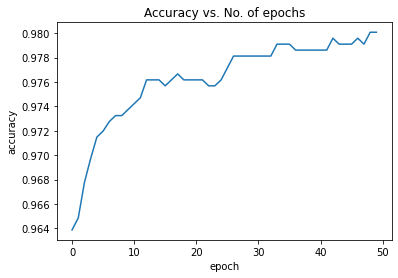

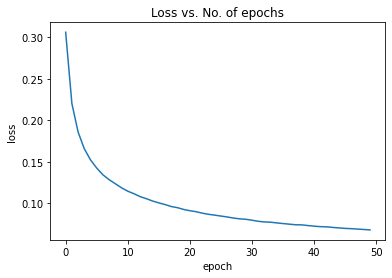

In [50]:
accuracies = [result['val_acc'] for result in history_1]
loss = [result['val_loss'] for result in history_1]
plot1 = plt.figure(1)
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plot2 = plt.figure(2)
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')
plt.show()

In [ ]:
model_1 = MnistModel()
# Use Learning rate of 0.01 to train the model for 50 epoches
history_2 = fit(50, 0.01, model_1, train_loader, val_loader)

Epoch [0], val_loss: 0.2187, val_acc: 0.9583
Epoch [1], val_loss: 0.1682, val_acc: 0.9588
Epoch [2], val_loss: 0.1448, val_acc: 0.9617
Epoch [3], val_loss: 0.1291, val_acc: 0.9686
Epoch [4], val_loss: 0.1202, val_acc: 0.9676
Epoch [5], val_loss: 0.1122, val_acc: 0.9705
Epoch [6], val_loss: 0.1067, val_acc: 0.9690
Epoch [7], val_loss: 0.1010, val_acc: 0.9729
Epoch [8], val_loss: 0.0982, val_acc: 0.9715
Epoch [9], val_loss: 0.0942, val_acc: 0.9729
Epoch [10], val_loss: 0.0904, val_acc: 0.9739
Epoch [11], val_loss: 0.0878, val_acc: 0.9759
Epoch [12], val_loss: 0.0856, val_acc: 0.9759
Epoch [13], val_loss: 0.0833, val_acc: 0.9764
Epoch [14], val_loss: 0.0815, val_acc: 0.9759
Epoch [15], val_loss: 0.0796, val_acc: 0.9769
Epoch [16], val_loss: 0.0781, val_acc: 0.9769
Epoch [17], val_loss: 0.0764, val_acc: 0.9773
Epoch [18], val_loss: 0.0753, val_acc: 0.9783
Epoch [19], val_loss: 0.0745, val_acc: 0.9778
Epoch [20], val_loss: 0.0729, val_acc: 0.9783
Epoch [21], val_loss: 0.0715, val_acc: 0.980

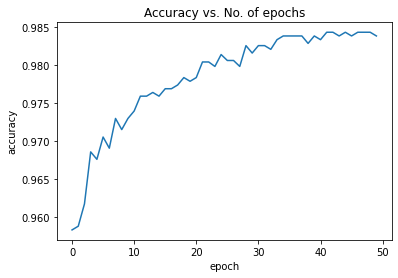

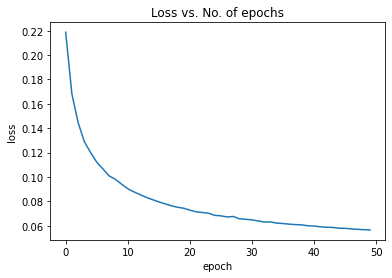

In [ ]:
accuracies = [result['val_acc'] for result in history_2]
loss = [result['val_loss'] for result in history_2]
plot1 = plt.figure(1)
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plot2 = plt.figure(2)
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')
plt.show()

In [ ]:
model_1 = MnistModel()
# Use Learning rate of 0.02 to train the model for 50 epoches
history_3 = fit(50, 0.02, model_1, train_loader, val_loader)

Epoch [0], val_loss: 0.1686, val_acc: 0.9688
Epoch [1], val_loss: 0.1302, val_acc: 0.9697
Epoch [2], val_loss: 0.1129, val_acc: 0.9715
Epoch [3], val_loss: 0.1027, val_acc: 0.9754
Epoch [4], val_loss: 0.0937, val_acc: 0.9747
Epoch [5], val_loss: 0.0885, val_acc: 0.9767
Epoch [6], val_loss: 0.0844, val_acc: 0.9776
Epoch [7], val_loss: 0.0796, val_acc: 0.9784
Epoch [8], val_loss: 0.0772, val_acc: 0.9776
Epoch [9], val_loss: 0.0751, val_acc: 0.9776
Epoch [10], val_loss: 0.0713, val_acc: 0.9789
Epoch [11], val_loss: 0.0704, val_acc: 0.9804
Epoch [12], val_loss: 0.0688, val_acc: 0.9804
Epoch [13], val_loss: 0.0665, val_acc: 0.9799
Epoch [14], val_loss: 0.0652, val_acc: 0.9799
Epoch [15], val_loss: 0.0640, val_acc: 0.9799
Epoch [16], val_loss: 0.0627, val_acc: 0.9804
Epoch [17], val_loss: 0.0629, val_acc: 0.9818
Epoch [18], val_loss: 0.0606, val_acc: 0.9809
Epoch [19], val_loss: 0.0603, val_acc: 0.9809
Epoch [20], val_loss: 0.0600, val_acc: 0.9828
Epoch [21], val_loss: 0.0594, val_acc: 0.982

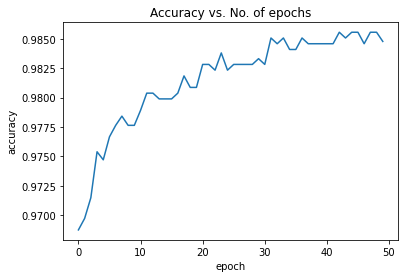

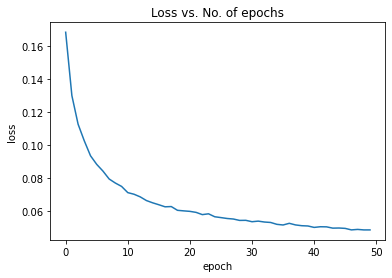

In [ ]:
accuracies = [result['val_acc'] for result in history_3]
loss = [result['val_loss'] for result in history_3]
plot1 = plt.figure(1)
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plot2 = plt.figure(2)
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')
plt.show()

In [ ]:
model_1 = MnistModel()
# Use Learning rate of 0.04 to train the model for 50 epoches
history_4 = fit(50, 0.04, model_1, train_loader, val_loader)

Epoch [0], val_loss: 0.1278, val_acc: 0.9700
Epoch [1], val_loss: 0.1018, val_acc: 0.9771
Epoch [2], val_loss: 0.0866, val_acc: 0.9774
Epoch [3], val_loss: 0.0795, val_acc: 0.9804
Epoch [4], val_loss: 0.0753, val_acc: 0.9813
Epoch [5], val_loss: 0.0692, val_acc: 0.9809
Epoch [6], val_loss: 0.0655, val_acc: 0.9809
Epoch [7], val_loss: 0.0629, val_acc: 0.9809
Epoch [8], val_loss: 0.0620, val_acc: 0.9818
Epoch [9], val_loss: 0.0608, val_acc: 0.9828
Epoch [10], val_loss: 0.0598, val_acc: 0.9838
Epoch [11], val_loss: 0.0574, val_acc: 0.9833
Epoch [12], val_loss: 0.0552, val_acc: 0.9818
Epoch [13], val_loss: 0.0549, val_acc: 0.9833
Epoch [14], val_loss: 0.0532, val_acc: 0.9823
Epoch [15], val_loss: 0.0529, val_acc: 0.9841
Epoch [16], val_loss: 0.0526, val_acc: 0.9846
Epoch [17], val_loss: 0.0540, val_acc: 0.9855
Epoch [18], val_loss: 0.0515, val_acc: 0.9838
Epoch [19], val_loss: 0.0509, val_acc: 0.9843
Epoch [20], val_loss: 0.0527, val_acc: 0.9855
Epoch [21], val_loss: 0.0494, val_acc: 0.983

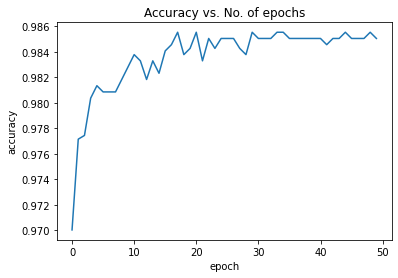

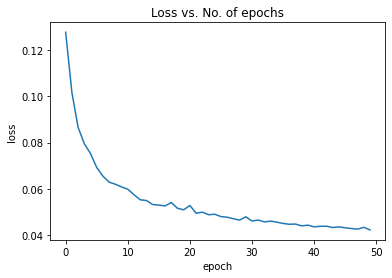

In [ ]:
accuracies = [result['val_acc'] for result in history_4]
loss = [result['val_loss'] for result in history_4]
plot1 = plt.figure(1)
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plot2 = plt.figure(2)
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')
plt.show()

In the code above, we tried the learning rates of 0.005, 0.01, 0.02, 0.04 to train the model respectively. We found that the learning rate of 0.02 is the the most appropriate one to train this model. Smaller rate like 0.005 would require more epoches to train the model, while larger rate like 0.04 results in overshoot of the optimal point at the end.  

In [ ]:
class MnistModel_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        nn.init.xavier_normal_(self.linear.weight)
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = bi_logit_loss_M(labels,out) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = bi_logit_loss_M(labels,out)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


In [ ]:
model_2 = MnistModel_2()
# Use Xavier initialization for the weight, and Learning rate of 0.02 to train the model for 50 epoches
history_5 = fit(50, 0.02, model_2, train_loader, val_loader)

Epoch [0], val_loss: 0.1640, val_acc: 0.9482
Epoch [1], val_loss: 0.1272, val_acc: 0.9600
Epoch [2], val_loss: 0.1127, val_acc: 0.9600
Epoch [3], val_loss: 0.1001, val_acc: 0.9700
Epoch [4], val_loss: 0.0928, val_acc: 0.9732
Epoch [5], val_loss: 0.0865, val_acc: 0.9752
Epoch [6], val_loss: 0.0829, val_acc: 0.9757
Epoch [7], val_loss: 0.0795, val_acc: 0.9771
Epoch [8], val_loss: 0.0762, val_acc: 0.9786
Epoch [9], val_loss: 0.0740, val_acc: 0.9796
Epoch [10], val_loss: 0.0713, val_acc: 0.9796
Epoch [11], val_loss: 0.0699, val_acc: 0.9791
Epoch [12], val_loss: 0.0685, val_acc: 0.9791
Epoch [13], val_loss: 0.0675, val_acc: 0.9796
Epoch [14], val_loss: 0.0667, val_acc: 0.9796
Epoch [15], val_loss: 0.0640, val_acc: 0.9815
Epoch [16], val_loss: 0.0628, val_acc: 0.9815
Epoch [17], val_loss: 0.0618, val_acc: 0.9823
Epoch [18], val_loss: 0.0617, val_acc: 0.9825
Epoch [19], val_loss: 0.0600, val_acc: 0.9833
Epoch [20], val_loss: 0.0594, val_acc: 0.9838
Epoch [21], val_loss: 0.0588, val_acc: 0.983

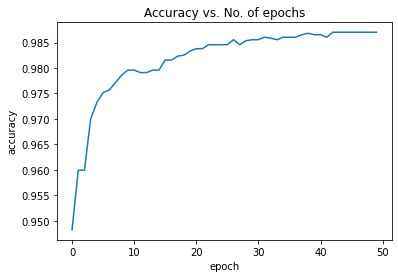

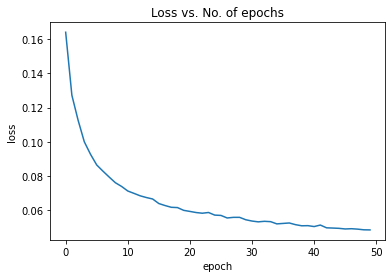

In [ ]:
accuracies = [result['val_acc'] for result in history_5]
loss = [result['val_loss'] for result in history_5]
plot1 = plt.figure(1)
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plot2 = plt.figure(2)
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')
plt.show()

In this part, we use Xavier method to initialize the weight of our linear layer. We can see that this initialization helps us to smooth out the learning curve, and make the loss function converge faster. 

# Acknowledgement
I worked with Yicheng Zou and Haikang Deng to finish this assignment. 

Part of the code in Question 3 is adapted from the example code of the online course _PyTorch for Deep Learning_. 

The following is the link to the original code. https://jovian.ai/aakashns/03-logistic-regression